In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import stats
import matplotlib.gridspec as gridspec

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

newparams = {'axes.labelsize': 24, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 2, 'figure.figsize': (8, 6),
             'figure.subplot.wspace': 0.4,
             'ytick.labelsize': 22, 'xtick.labelsize': 22,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 24, 'legend.frameon': True, 
             'legend.handlelength': 2}
plt.rcParams.update(newparams)

In [2]:
dir17="../PartD_Prescriber_PUF_NPI_17/"
dir16="../PartD_Prescriber_PUF_NPI_16/"

In [3]:
data=pd.read_table(dir17+'PartD_Prescriber_PUF_NPI_17.txt')

In [4]:
#Q1
beneficiary_age_less_65_count=data["beneficiary_age_less_65_count"]
beneficiary_age_65_74_count=data["beneficiary_age_65_74_count"]
beneficiary_age_75_84_count=data["beneficiary_age_75_84_count"]
beneficiary_age_greater_84_count=data["beneficiary_age_greater_84_count"]
bene_count=data["bene_count"]

total_number_of_beneficiary=beneficiary_age_greater_84_count+beneficiary_age_75_84_count+beneficiary_age_65_74_count+beneficiary_age_less_65_count
print("Q1 average number of beneficiary is ", np.mean(total_number_of_beneficiary),np.mean(bene_count))

Q1 average number of beneficiary is  330.57885562023495 158.3494585173676


In [5]:
#Q2
specialty_description=data["specialty_description"]
s_set = set(specialty_description)
brand_suppress_flag=data["brand_suppress_flag"] #NaN is good
total_claim_count=data["total_claim_count"]
brand_claim_count=data["brand_claim_count"]

In [6]:
n_claims=np.zeros(len(s_set))
brand_fraction=np.zeros(len(s_set))
i=0
for name in s_set:
    good=(specialty_description==name)&(brand_suppress_flag!="NaN")
    n_claims[i]=np.sum(total_claim_count[good])
    brand_fraction[i]=np.sum(brand_claim_count[good])/n_claims[i]
    i+=1

i=0
for name in s_set:
    if n_claims[i]>1000:
        print(name," fraction= ",brand_fraction[i])
    i+=1

In [7]:
good=n_claims>1000
print(np.std(brand_fraction[good]))

0.0913229722535466


In [9]:
#Q3
opioid_claim_count=data["opioid_claim_count"]
opioid_day_supply=data["opioid_day_supply"]
nppes_provider_state=data["nppes_provider_state"]

not_state=["XX","AA","AE","AP","AS","GU","MP","PR","VI","ZZ"]
bad=np.isin(nppes_provider_state,not_state)
state_set = set(nppes_provider_state[~bad])

In [10]:
length_opioid=opioid_day_supply/opioid_claim_count
q3=np.zeros(shape=(len(s_set),len(state_set)))

In [11]:
i=0
aa=np.zeros(shape=(len(s_set),len(state_set)))
bb=np.zeros(len(s_set))
for sp in s_set:
    j=0
    good2=(specialty_description==sp)&(length_opioid>0)
    bb[i]=np.mean(length_opioid[good2])
    for state in state_set:
        good=good2&(nppes_provider_state==state)
        if (len(length_opioid[good])>100):
            aa[i,j]=np.mean(length_opioid[good])
        j+=1
    i+=1

In [12]:
print(np.max(aa),np.max(bb[bb>0]))

31.898681991464333 30.30131772988916


/Users/yli/source/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [13]:
#Q4
total_day_supply=data["total_day_supply"]
total_claim_count=data["total_claim_count"]
length_of_prescription=total_day_supply/total_claim_count
print(np.median(length_of_prescription))

29.7125748502994


In [14]:
#Q5
antibiotic_claim_count=data["antibiotic_claim_count"]
q5=np.zeros(len(state_set))
op=total_number_of_beneficiary[opioid_claim_count>10]
anti=total_number_of_beneficiary[antibiotic_claim_count>10]
i=0
for state in state_set:
    good=(nppes_provider_state==state)
    q5[i]=(np.sum(op[good])/np.sum(anti[good]))
    i+=1
print(np.max(q5[q5>0])-np.min(q5[q5>0]))

0.19195901275274896


In [15]:
#Q6
older=beneficiary_age_65_74_count+beneficiary_age_75_84_count+beneficiary_age_greater_84_count
older_fraction=older/total_number_of_beneficiary

In [16]:
lis_claim_count=data["lis_claim_count"]
nonlis_claim_count=data["nonlis_claim_count"]
check_total=nonlis_claim_count+lis_claim_count
lis_fraction=lis_claim_count/check_total

In [17]:
good=(older_fraction>0)&(lis_fraction>0)
r, p = stats.pearsonr(older_fraction[good], lis_fraction[good])
print("Pearson correlation coefficient r and p", r,p)

Pearson correlation coefficient r and p -0.5615508018971427 0.0


In [18]:
#Q7
npi=data["npi"]
total_drug_cost=data["total_drug_cost"]
daily_cost=total_drug_cost/total_day_supply

In [19]:
data16=pd.read_table(dir16+'PartD_Prescriber_PUF_NPI_16.txt')
npi16=data16["npi"]
total_drug_cost16=data16["total_drug_cost"]
total_day_supply16=data16["total_day_supply"]
daily_cost16=total_drug_cost16/total_day_supply16


In [20]:
mask17 = np.isin(npi, npi16)
mask16=np.isin(npi16, npi)
inflation=daily_cost[mask17]/daily_cost16[mask16]-1


In [21]:

print(np.mean(inflation[inflation>-1]))

1.9481466141488235


In [22]:
#Q8
specialty_description16=data16["specialty_description"]
f_left=np.zeros(len(s_set))
i=0
for sp in s_set:
    good17=(specialty_description==sp)
    good16=(specialty_description16==sp)
    stay_npi=np.isin(npi16[good16],npi[good17])
    if len(npi16[good16])>1000:
        f_left[i]=1-len(npi16[good16][stay_npi])/len(npi16[good16])
    i+=1

In [23]:
print("Q8",np.max(f_left))


Q8 0.3768656716417911


In [24]:
#below is the new project

In [25]:
dr_opioid=opioid_claim_count/bene_count
dr_antibiotic=antibiotic_claim_count/bene_count

In [26]:
good=(dr_antibiotic>0)&(dr_opioid>0)
rr, pp = stats.spearmanr(dr_opioid[good], dr_antibiotic[good])
print(rr,pp)

0.07246225800796646 0.0


/Users/yli/source/yt-conda/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


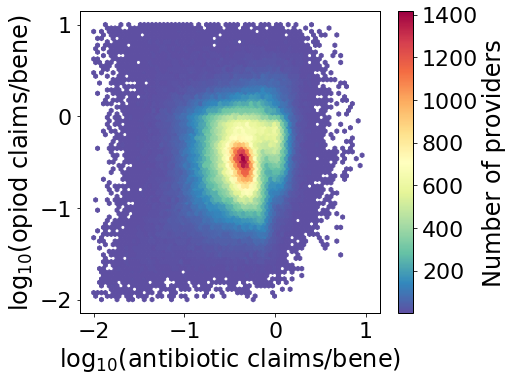

In [38]:
import matplotlib.gridspec as gridspec
plt.clf()
gs1=gridspec.GridSpec(1,1)
gs1.update(left=0.2, right=0.85,bottom=0.2,top=0.9, hspace=0.0001,wspace=0.0001)
ax=plt.subplot(gs1[0])
#extent=numpy.log10([0.5,6,0.5,6])
extent=[-2,1,-2,1]
image=plt.hexbin(np.log10(dr_antibiotic),np.log10(dr_opioid),extent=extent, gridsize=70,cmap=plt.cm.Spectral_r,mincnt=1,rasterized=True)
#image=pylab.hexbin(Sersic_Dandan.flatten(),Sersic.flatten(),extent=extent, gridsize=70,cmap=pylab.cm.Spectral_r,mincnt=1,vmin=1,vmax=50,rasterized=True)
plt.xlabel(r'$\rm log_{10}$'+"(antibiotic claims/bene)")
plt.ylabel(r'$\rm log_{10}$'+"(opiod claims/bene)")

cb = plt.colorbar(image)
cb.set_label(r'Number of providers')
plt.savefig("provider_correlation.png")
plt.show()


In [28]:
e_data=pd.read_table("../President2016.txt",header=None)

In [29]:
e_data_array=e_data.to_numpy()
e_data_array.shape

(51, 25)

In [30]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
locale.atoi(e_data_array[3,2])

380494

In [31]:
trump_votes = np.array([locale.atoi(x) for x in e_data_array[:,5]])
H_votes = np.array([locale.atoi(x) for x in e_data_array[:,2]])

In [32]:
red=H_votes<trump_votes #If trump wins, define the sate as a red state
#redness=trump_votes/(trump_votes+H_votes) #trump vs Hillary 

In [33]:
antibiotic_bene_count=data["antibiotic_bene_count"]
opioid_bene_count=data["opioid_bene_count"]

In [34]:
i=0
state_opioid_claim_count=np.zeros(len(state_set))
state_opioid_bene_count=np.zeros(len(state_set))
state_antibiotic_claim_count=np.zeros(len(state_set))
state_antibiotic_bene_count=np.zeros(len(state_set))

state_n_beneficiary=np.zeros(len(state_set))
state_color=np.ones(len(state_set)) 
for state in state_set:
    good=(nppes_provider_state==state)
    state_opioid_claim_count[i]=np.sum(opioid_claim_count[good])
    state_opioid_bene_count[i]=np.sum(opioid_bene_count[good])
    state_antibiotic_bene_count[i]=np.sum(antibiotic_bene_count[good])
    state_antibiotic_claim_count[i]=np.sum(antibiotic_claim_count[good])
    state_n_beneficiary[i]=np.sum(total_number_of_beneficiary[good])
    state_color[i]=np.isin(state,e_data_array[red,23])
    i+=1

In [35]:
opioid_per_beneficiary=state_opioid_claim_count/state_n_beneficiary
opioid_per_beneficiary.shape
antibiotic_per_beneficiary=state_antibiotic_claim_count/state_n_beneficiary

In [36]:
nppes_provider_state16=data16["nppes_provider_state"]
opioid_claim_count16=data16["opioid_claim_count"]
antibiotic_claim_count16=data16["antibiotic_claim_count"]

In [39]:
beneficiary_age_less_65_count16=data16["beneficiary_age_less_65_count"]
beneficiary_age_65_74_count16=data16["beneficiary_age_65_74_count"]
beneficiary_age_75_84_count16=data16["beneficiary_age_75_84_count"]
beneficiary_age_greater_84_count16=data16["beneficiary_age_greater_84_count"]
bene_count16=data16["bene_count"]

total_number_of_beneficiary16=beneficiary_age_greater_84_count16\
+beneficiary_age_75_84_count16+beneficiary_age_65_74_count16+beneficiary_age_less_65_count16

In [40]:
i=0
state_opioid_claim_count16=np.zeros(len(state_set))
state_antibiotic_claim_count16=np.zeros(len(state_set))
state_n_beneficiary16=np.zeros(len(state_set))
for state in state_set:
    good=(nppes_provider_state16==state)
    state_opioid_claim_count16[i]=np.sum(opioid_claim_count16[good])
    state_n_beneficiary16[i]=np.sum(total_number_of_beneficiary16[good])
    state_antibiotic_claim_count16[i]=np.sum(antibiotic_claim_count16[good])
    i+=1

In [41]:
opioid_per_beneficiary16=state_opioid_claim_count16/state_n_beneficiary16
antibiotic_per_beneficiary16=state_antibiotic_claim_count16/state_n_beneficiary16

In [42]:
rr, pp = stats.pearsonr(antibiotic_per_beneficiary, opioid_per_beneficiary)
print(rr,pp)
e_data_array[antibiotic_per_beneficiary==np.max(antibiotic_per_beneficiary),23]

0.7057030939216002 7.3228019395801524e-09


array(['IN'], dtype=object)

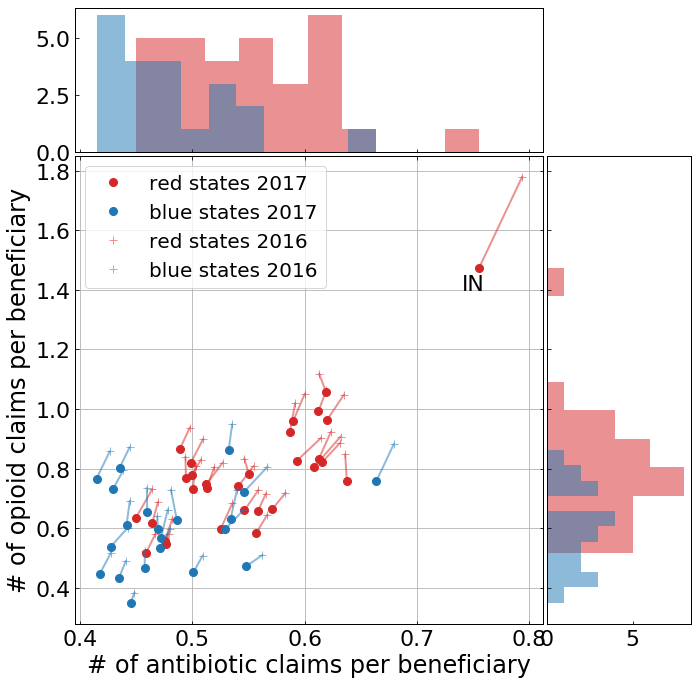

In [43]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005
plt.clf()

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

plt.figure(figsize=(10, 10))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

ax_scatter.plot(antibiotic_per_beneficiary[state_color==1],opioid_per_beneficiary[state_color==1],color="C3",linestyle="None",marker="o",markersize=8)
ax_scatter.plot(antibiotic_per_beneficiary[state_color==0],opioid_per_beneficiary[state_color==0],color="C0",linestyle="None",marker="o",markersize=8)

ax_scatter.plot(antibiotic_per_beneficiary16[state_color==1],opioid_per_beneficiary16[state_color==1],color="C3",alpha=0.5,linestyle="None",marker="+",markersize=8)
ax_scatter.plot(antibiotic_per_beneficiary16[state_color==0],opioid_per_beneficiary16[state_color==0],color="C0",alpha=0.5,linestyle="None",marker="+",markersize=8)

ax_scatter.legend(("red states 2017","blue states 2017","red states 2016","blue states 2016"),loc="best",fontsize=20)

ax_scatter.plot([antibiotic_per_beneficiary[state_color==1],antibiotic_per_beneficiary16[state_color==1]],[opioid_per_beneficiary[state_color==1],opioid_per_beneficiary16[state_color==1]],\
          color="C3",linestyle="-",alpha=0.5)

ax_scatter.plot([antibiotic_per_beneficiary[state_color==0],antibiotic_per_beneficiary16[state_color==0]],[opioid_per_beneficiary[state_color==0],opioid_per_beneficiary16[state_color==0]],\
          color="C0",linestyle="-",alpha=0.5)

ax_histx.hist(antibiotic_per_beneficiary[state_color==1],color="C3",alpha=0.5)
ax_histx.hist(antibiotic_per_beneficiary[state_color==0],color="C0",alpha=0.5)

ax_histy.hist(opioid_per_beneficiary[state_color==1],color="C3",alpha=0.5, orientation='horizontal')
ax_histy.hist(opioid_per_beneficiary[state_color==0],color="C0",alpha=0.5, orientation='horizontal')
#ax_histy.hist(opioid_per_beneficiary16[state_color==1],color="C3",alpha=0.5, orientation='horizontal',histtype='step',fill=False)
#ax_histy.hist(opioid_per_beneficiary16[state_color==0],color="C0",alpha=0.5, orientation='horizontal',histtype='step',fill=False)

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())
ax_scatter.set_xlabel("# of antibiotic claims per beneficiary")
ax_scatter.set_ylabel("# of opioid claims per beneficiary")
ax_scatter.text(np.max(antibiotic_per_beneficiary)*0.98, np.max(opioid_per_beneficiary)*0.95,\
                e_data_array[antibiotic_per_beneficiary==np.max(antibiotic_per_beneficiary),23][0],fontsize=22)
ax_scatter.grid()
plt.savefig("compare_states_16_17.png")
plt.show()